In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

## Principal Component Analysis (PCA)

### Objective
The goal of this notebook is to perform PCA on financial data from 2014 to 2018 to reduce the number of features and identify the principal components that capture the most variance in the data.

### Methodology
1. **Data Loading**: Load the processed data for each year.
2. **Standardization**: Standardize the features since PCA is affected by scale.
3. **PCA Execution**: Perform PCA to reduce dimensions while retaining 95% of the variance.
4. **Results Analysis**: Plot and examine the explained variance to determine how many features are necessary to capture the majority of the information.

### Results
The PCA results will help in understanding the underlying structure of the data and guide further analyses and modeling efforts.


In [2]:
data_2014 = pd.read_csv('processed_data/clean_df_2014.csv')
data_2015 = pd.read_csv('processed_data/clean_df_2015.csv')
data_2016 = pd.read_csv('processed_data/clean_df_2016.csv')
data_2017 = pd.read_csv('processed_data/clean_df_2017.csv')
data_2018 = pd.read_csv('processed_data/clean_df_2018.csv')

In [3]:
def perform_pca_analysis(data, num_top_features=10):
    """
    Perform PCA on the provided dataset and visualize the explained variance.
    Also, provide the loadings for the top features of each component.
    
    Parameters:
    - data (DataFrame): The dataset to perform PCA on.
    - num_top_features (int): Number of top features' loadings to return for each component.
    
    Returns:
    - pca: The PCA model.
    - explained_variance_plot: Matplotlib figure object for the explained variance plot.
    - loadings_dict: Dictionary containing the loadings for the top features of each component.
    """
    # Isolate numeric data for PCA
    numeric_data = data.select_dtypes(include=[np.number])
    
    # Standardize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(numeric_data)
    
    # Perform PCA
    pca = PCA()
    pca.fit(scaled_data)
    
    # Explained variance plot
    plt.figure(figsize=(10, 6))
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('Explained Variance by PCA Components')
    plt.grid(True)
    explained_variance_plot = plt
    
    # Create a dictionary to store loadings for each component
    loadings_dict = {}
    for i in range(len(pca.components_)):
        loadings = pca.components_[i]
        loading_scores = pd.Series(loadings, index=numeric_data.columns)
        sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
        loadings_dict[f"Component {i+1}"] = sorted_loading_scores.head(num_top_features)
    
    return pca, explained_variance_plot, loadings_dict

# 2014 dataset

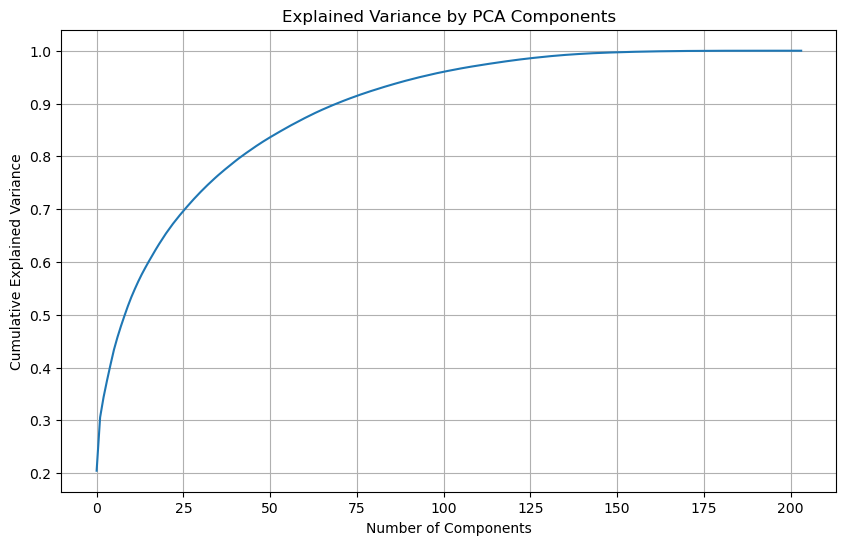

 --- COMPONENT 1 --- 
EBITDA                       0.142399
EBIT                         0.142025
Operating Income             0.140492
Gross Profit                 0.139914
Operating Cash Flow          0.139287
Earnings before Tax          0.138717
Consolidated Income          0.137934
Net Income                   0.137526
Total shareholders equity    0.137431
Net Income Com               0.137247
dtype: float64
 --- COMPONENT 2 --- 
ebitperRevenue                 0.168797
eBITperRevenue                 0.168797
netProfitMargin                0.168747
pretaxProfitMargin             0.167647
Profit Margin                  0.163799
EBITDA Margin                  0.163597
operatingCashFlowSalesRatio    0.162451
Earnings Before Tax Margin     0.161830
EBIT Margin                    0.161649
Net Profit Margin              0.161326
dtype: float64
 --- COMPONENT 3 --- 
Graham Net-Net                   0.217336
Tangible Book Value per Share    0.205756
companyEquityMultiplier          0.18414

In [4]:
# 2014 dataset
pca_model, ev_plot, loadings_2014 = perform_pca_analysis(data_2014)
ev_plot.show()

# Displaying loadings
print(' --- COMPONENT 1 --- ')
print(loadings_2014["Component 1"])
print(' --- COMPONENT 2 --- ')
print(loadings_2014["Component 2"])
print(' --- COMPONENT 3 --- ')
print(loadings_2014["Component 3"])

# 2015 dataset

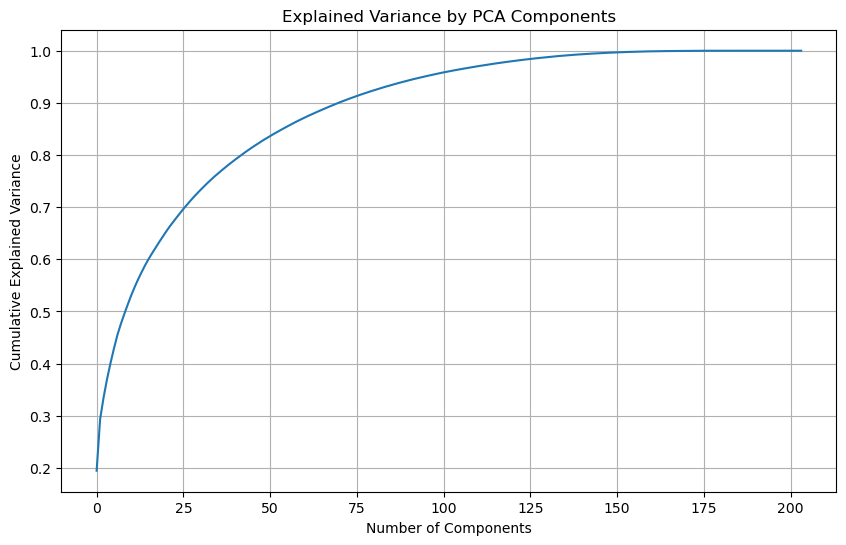

 --- COMPONENT 1 --- 
EBITDA                       0.142399
EBIT                         0.142025
Operating Income             0.140492
Gross Profit                 0.139914
Operating Cash Flow          0.139287
Earnings before Tax          0.138717
Consolidated Income          0.137934
Net Income                   0.137526
Total shareholders equity    0.137431
Net Income Com               0.137247
dtype: float64
 --- COMPONENT 2 --- 
ebitperRevenue                 0.168797
eBITperRevenue                 0.168797
netProfitMargin                0.168747
pretaxProfitMargin             0.167647
Profit Margin                  0.163799
EBITDA Margin                  0.163597
operatingCashFlowSalesRatio    0.162451
Earnings Before Tax Margin     0.161830
EBIT Margin                    0.161649
Net Profit Margin              0.161326
dtype: float64
 --- COMPONENT 3 --- 
Graham Net-Net                   0.217336
Tangible Book Value per Share    0.205756
companyEquityMultiplier          0.18414

In [5]:
# 2015 dataset
pca_model, ev_plot, loadings_2015 = perform_pca_analysis(data_2015)
ev_plot.show()

# Displaying loadings
print(' --- COMPONENT 1 --- ')
print(loadings_2014["Component 1"])
print(' --- COMPONENT 2 --- ')
print(loadings_2014["Component 2"])
print(' --- COMPONENT 3 --- ')
print(loadings_2014["Component 3"])

# 2016 dataset

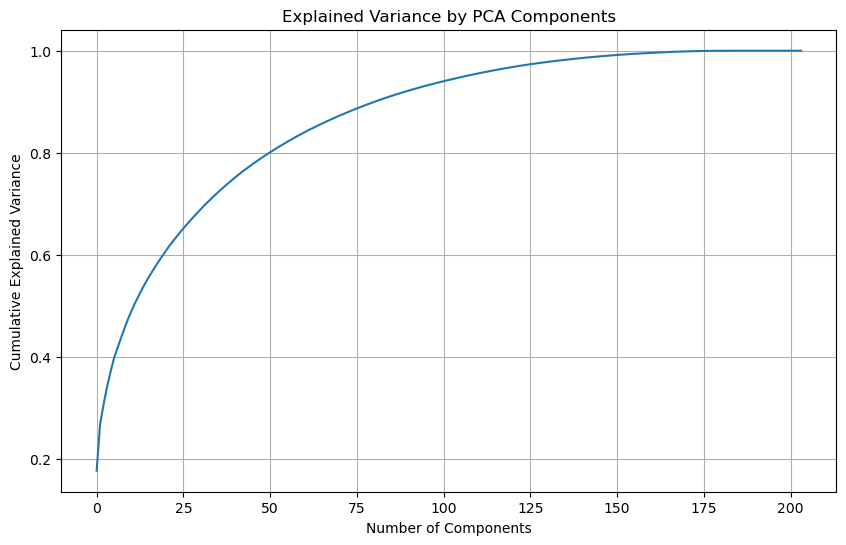

 --- COMPONENT 1 --- 
EBITDA                       0.142399
EBIT                         0.142025
Operating Income             0.140492
Gross Profit                 0.139914
Operating Cash Flow          0.139287
Earnings before Tax          0.138717
Consolidated Income          0.137934
Net Income                   0.137526
Total shareholders equity    0.137431
Net Income Com               0.137247
dtype: float64
 --- COMPONENT 2 --- 
ebitperRevenue                 0.168797
eBITperRevenue                 0.168797
netProfitMargin                0.168747
pretaxProfitMargin             0.167647
Profit Margin                  0.163799
EBITDA Margin                  0.163597
operatingCashFlowSalesRatio    0.162451
Earnings Before Tax Margin     0.161830
EBIT Margin                    0.161649
Net Profit Margin              0.161326
dtype: float64
 --- COMPONENT 3 --- 
Graham Net-Net                   0.217336
Tangible Book Value per Share    0.205756
companyEquityMultiplier          0.18414

In [6]:
# 2016 dataset
pca_model, ev_plot, loadings_2016 = perform_pca_analysis(data_2016)
ev_plot.show()

# Displaying loadings
print(' --- COMPONENT 1 --- ')
print(loadings_2014["Component 1"])
print(' --- COMPONENT 2 --- ')
print(loadings_2014["Component 2"])
print(' --- COMPONENT 3 --- ')
print(loadings_2014["Component 3"])

# 2017 dataset

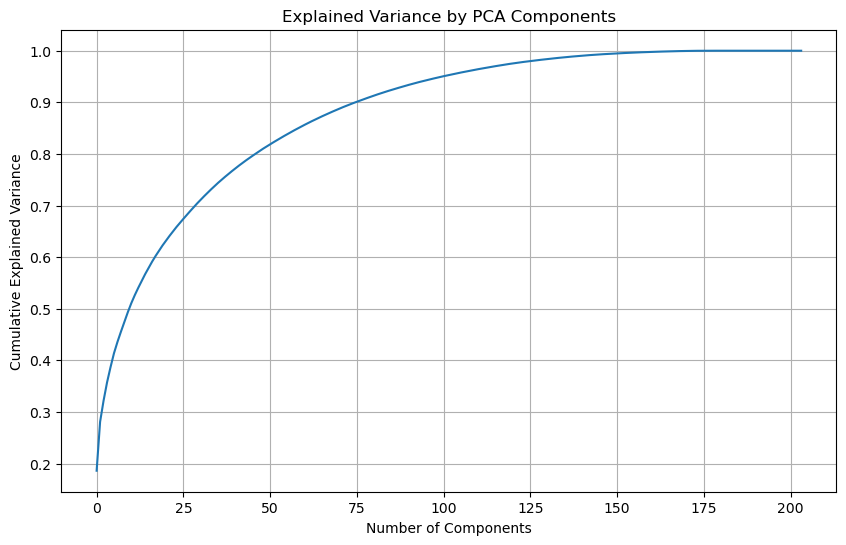

 --- COMPONENT 1 --- 
EBITDA                       0.142399
EBIT                         0.142025
Operating Income             0.140492
Gross Profit                 0.139914
Operating Cash Flow          0.139287
Earnings before Tax          0.138717
Consolidated Income          0.137934
Net Income                   0.137526
Total shareholders equity    0.137431
Net Income Com               0.137247
dtype: float64
 --- COMPONENT 2 --- 
ebitperRevenue                 0.168797
eBITperRevenue                 0.168797
netProfitMargin                0.168747
pretaxProfitMargin             0.167647
Profit Margin                  0.163799
EBITDA Margin                  0.163597
operatingCashFlowSalesRatio    0.162451
Earnings Before Tax Margin     0.161830
EBIT Margin                    0.161649
Net Profit Margin              0.161326
dtype: float64
 --- COMPONENT 3 --- 
Graham Net-Net                   0.217336
Tangible Book Value per Share    0.205756
companyEquityMultiplier          0.18414

In [7]:
# 2016 dataset
pca_model, ev_plot, loadings_2017 = perform_pca_analysis(data_2017)
ev_plot.show()

# Displaying loadings
print(' --- COMPONENT 1 --- ')
print(loadings_2014["Component 1"])
print(' --- COMPONENT 2 --- ')
print(loadings_2014["Component 2"])
print(' --- COMPONENT 3 --- ')
print(loadings_2014["Component 3"])

# 2018 dataset

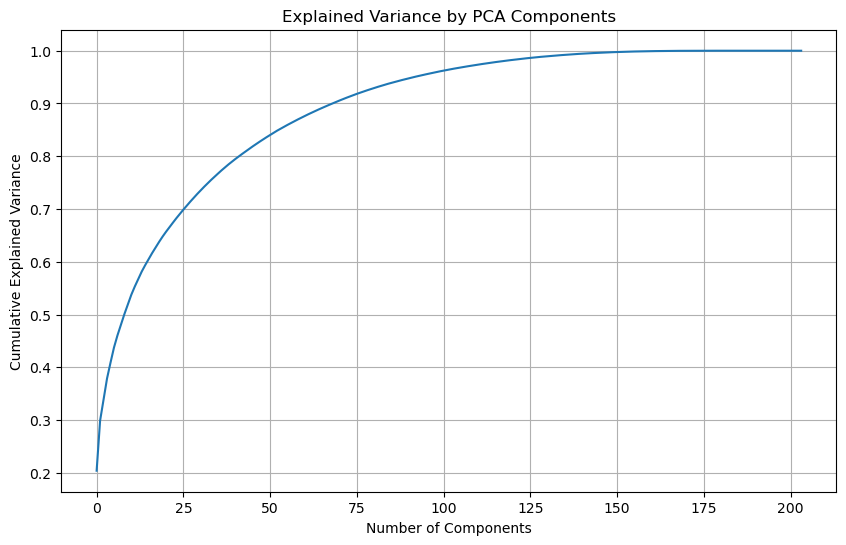

 --- COMPONENT 1 --- 
EBITDA                       0.142399
EBIT                         0.142025
Operating Income             0.140492
Gross Profit                 0.139914
Operating Cash Flow          0.139287
Earnings before Tax          0.138717
Consolidated Income          0.137934
Net Income                   0.137526
Total shareholders equity    0.137431
Net Income Com               0.137247
dtype: float64
 --- COMPONENT 2 --- 
ebitperRevenue                 0.168797
eBITperRevenue                 0.168797
netProfitMargin                0.168747
pretaxProfitMargin             0.167647
Profit Margin                  0.163799
EBITDA Margin                  0.163597
operatingCashFlowSalesRatio    0.162451
Earnings Before Tax Margin     0.161830
EBIT Margin                    0.161649
Net Profit Margin              0.161326
dtype: float64
 --- COMPONENT 3 --- 
Graham Net-Net                   0.217336
Tangible Book Value per Share    0.205756
companyEquityMultiplier          0.18414

In [8]:
# 2016 dataset
pca_model, ev_plot, loadings_2018 = perform_pca_analysis(data_2018)
ev_plot.show()

# Displaying loadings
print(' --- COMPONENT 1 --- ')
print(loadings_2014["Component 1"])
print(' --- COMPONENT 2 --- ')
print(loadings_2014["Component 2"])
print(' --- COMPONENT 3 --- ')
print(loadings_2014["Component 3"])

## PCA Explained Variance

- The plot shows that the cumulative explained variance increases sharply with the number of components and starts to plateau around 100 components.
- This suggests that around 100 components can explain most of the variance in the data, allowing for significant dimensionality reduction from the original number of features (which is around 200).

## Loadings for PCA Components (2014 and 2015)

### Component 1
The top features are related to profitability and earnings:

- **EBITDA, EBIT, Operating Income**: These are direct measures of a company's operational efficiency and profitability.
- **Gross Profit, Operating Cash Flow**: Indicate the fundamental earnings power of the company.

This component seems to capture the overall operational performance of companies.

### Component 2
The top features focus on various profitability ratios:

- **ebitperRevenue, netProfitMargin, pretaxProfitMargin**: These ratios measure the efficiency of profit generation relative to sales and pre-tax earnings.
- **Profit Margin, EBITDA Margin**: Further detail on profitability from different accounting perspectives.

This component reflects different facets of profitability margins, emphasizing how effectively companies convert sales into profits.

### Component 3
Features in this component are related to financial structure and valuation:

- **Graham Net-Net, Tangible Book Value per Share**: Indicators of potentially undervalued stocks based on asset-based valuation metrics.
- **companyEquityMultiplier**: A measure of financial leverage.
- **Net Cash/Marketcap, PTB ratio (Price to Book ratio)**: Indicators of financial stability and valuation.

This component captures aspects of company valuation and financial position, which can be crucial for assessing investment potential and risk.


# Now let's make a cluster analisys to get some insights.

In [9]:
# Make clustering
def kmeans_clustering_analysis(data, pca_components=2, num_clusters=4):
    """
    Perform K-means clustering on the provided dataset and visualize the clusters.
    
    Parameters:
    - data (DataFrame): The dataset to perform clustering on.
    - pca_components (int): Number of PCA components to use for clustering.
    - num_clusters (int): Number of clusters to form.
    
    Returns:
    - clusters: The cluster labels for each data point.
    - cluster_plot: Matplotlib figure object for the cluster plot.
    """
    # Isolate numeric data for clustering
    numeric_data = data.select_dtypes(include=[np.number])
    
    # Standardize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(numeric_data)
    
    # Apply PCA for dimensionality reduction
    pca = PCA(n_components=pca_components)
    pca_data = pca.fit_transform(scaled_data)
    
    # Determine the optimal number of clusters using the elbow method
    wcss = []
    for i in range(1, 15):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans.fit(pca_data)
        wcss.append(kmeans.inertia_)
    
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 15), wcss, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')
    plt.title('Elbow Method to Determine Optimal Number of Clusters')
    plt.grid(True)
    plt.show()

    # Apply K-means clustering with the chosen number of clusters
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
    clusters = kmeans.fit_predict(pca_data)

    # Calculate silhouette scores
    silhouette_avg = silhouette_score(pca_data, clusters)
    silhouette_values = silhouette_samples(pca_data, clusters)
    
    # Add cluster labels to the original data
    data['Cluster'] = clusters
    
    # Visualize the clusters
    plt.figure(figsize=(10, 6))
    plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters, cmap='viridis', marker='o')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('K-means Clustering')
    plt.colorbar(label='Cluster')
    plt.grid(True)
    cluster_plot = plt
    
    return clusters, cluster_plot, silhouette_avg, silhouette_values

# Run silhouette
def plot_silhouette_scores(clusters, silhouette_values, num_clusters, silhouette_avg):
    """
    Plot silhouette scores for each sample in each cluster.
    
    Parameters:
    - clusters: Cluster labels for each data point.
    - silhouette_values: Silhouette values for each data point.
    - num_clusters: Number of clusters.
    - silhouette_avg: Average silhouette score.
    
    Returns:
    - silhouette_plot: Matplotlib figure object for the silhouette plot.
    """
    plt.figure(figsize=(10, 6))
    y_lower = 10
    for i in range(num_clusters):
        ith_cluster_silhouette_values = silhouette_values[clusters == i]
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values)
        
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        
        y_lower = y_upper + 10

    plt.xlabel("Silhouette coefficient values")
    plt.ylabel("Cluster label")
    plt.title("Silhouette plot for the various clusters")
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    plt.show()

## Elbow Method Plot

This plot helps determine the optimal number of clusters. The "elbow" point appears around 3-4 clusters, which suggests that this is a reasonable choice for the number of clusters for the K-means algorithm.

## K-means Clustering Plot

This plot shows the results of K-means clustering using the first two principal components. Each color represents a different cluster.

## Insights from the Clustering Analysis

### Optimal Number of Clusters

The elbow plot suggests that 3-4 clusters are optimal. 

### Cluster Visualization

- The K-means clustering plot reveals how the data points are grouped in the reduced PCA space.
- The distinct separation between clusters suggests that the PCA transformation effectively captures the underlying structure of the data, and K-means clustering identifies meaningful groups.


# Year 2014

## Silhouette Plot and Clustering Analysis

### Silhouette Plot:
The silhouette plot shows the silhouette coefficient values for each sample in the clusters. The average silhouette score is approximately 0.63, indicating that the clusters are reasonably well-defined.

### Conclusions:

1. **Cluster Quality**:
   - The average silhouette score of 0.63 suggests that the clusters are well-defined and distinct.
   - The majority of samples have high silhouette scores, indicating good cohesion within clusters and separation between clusters.

2. **Cluster Sizes**:
   - Cluster 0 (blue) is the largest, followed by clusters 1 (orange), 2 (green), and 3 (red).
   - The thickness of each cluster's silhouette indicates the relative size of each cluster.


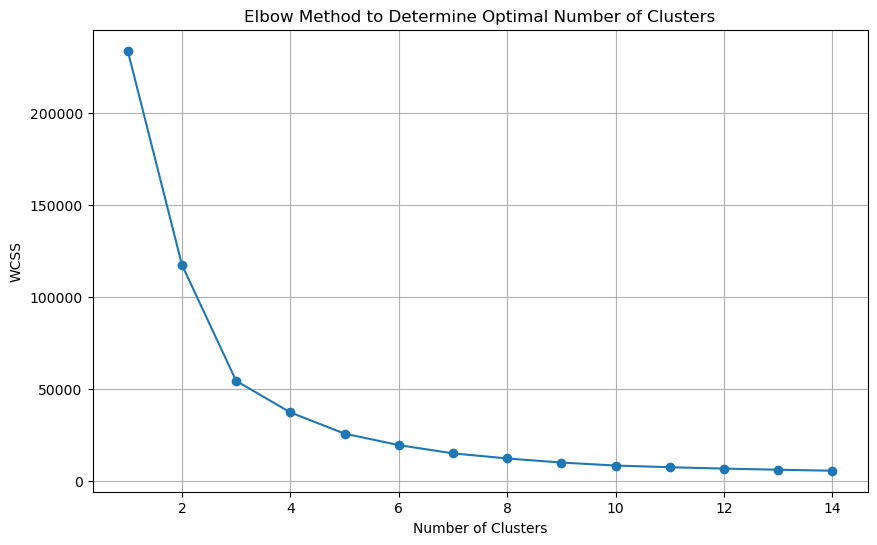

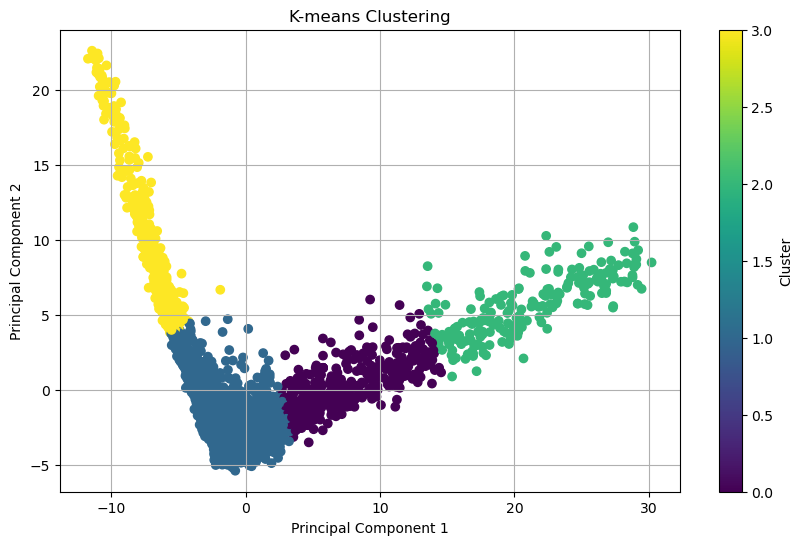

Average Silhouette Score: 0.6265582650916474


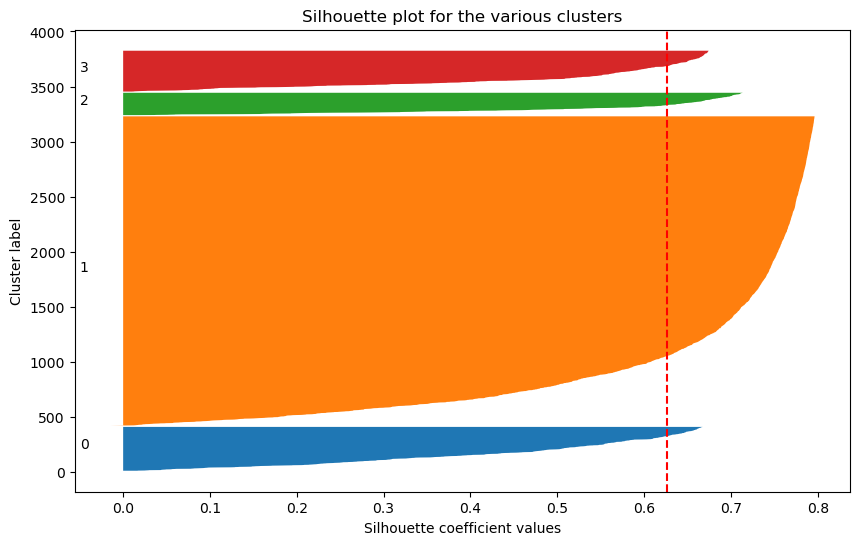

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,2015 PRICE VAR [%],Class,Year,Symbol,Sector,Cluster
0,3.943805e+10,-0.0713,2.046488e+10,1.553625e+10,0.000000e+00,6.575900e+09,1.028105e+10,4.859750e+09,6.159000e+08,4.242492e+09,...,0.03160,0.12280,0.000000,-0.174600,-9.323276,0.0,2014.0,PG,Consumer Defensive,2
1,3.734148e+09,1.1737,2.805625e+09,9.285226e+08,1.083303e+08,3.441414e+08,7.939267e+08,1.345959e+08,1.214869e+07,1.753823e+08,...,-0.11968,0.70216,1.098455,1.372495,-25.512193,0.0,2014.0,VIPS,Consumer Defensive,1
2,3.943805e+10,0.0182,2.046488e+10,1.553625e+10,0.000000e+00,6.575900e+09,1.028105e+10,2.725000e+09,4.430000e+08,2.270000e+09,...,0.32680,0.27380,0.000000,0.023400,33.118297,1.0,2014.0,KR,Consumer Defensive,2
3,2.552641e+10,0.0053,1.820268e+10,7.323734e+09,0.000000e+00,6.561162e+09,6.586482e+09,7.372520e+08,4.245910e+08,2.502180e+08,...,0.19630,-0.04580,0.000000,-0.006000,2.752291,1.0,2014.0,RAD,Consumer Defensive,0
4,1.790960e+10,0.0076,1.153980e+10,6.369800e+09,0.000000e+00,3.474300e+09,3.412400e+09,2.957400e+09,3.024000e+08,2.707700e+09,...,0.02740,0.10250,0.000000,-0.022000,12.897715,1.0,2014.0,GIS,Consumer Defensive,0


In [10]:
clusters, cluster_plot, silhouette_avg, silhouette_values = kmeans_clustering_analysis(data_2014, pca_components=2, num_clusters=4)
cluster_plot.show()

# Silhouette Score
print(f"Average Silhouette Score: {silhouette_avg}")
plot_silhouette_scores(clusters, silhouette_values, num_clusters=4, silhouette_avg=silhouette_avg)

# Display the first few rows of the dataframe with cluster labels
data_2014.head()

# Year 2015

## Silhouette Plot and Clustering Analysis

### Silhouette Plot:
The silhouette plot shows the silhouette coefficient values for each sample in the clusters. The average silhouette score is approximately 0.61, indicating that the clusters are reasonably well-defined.

### Conclusions:

1. **Cluster Quality**:
   - The average silhouette score of 0.61 suggests that the clusters are well-defined and distinct.
   - The majority of samples have high silhouette scores, indicating good cohesion within clusters and separation between clusters.

2. **Cluster Sizes**:
   - Cluster 0 (blue) is the largest, followed by clusters 1 (orange), 2 (green), and 3 (red).
   - The thickness of each cluster's silhouette indicates the relative size of each cluster.


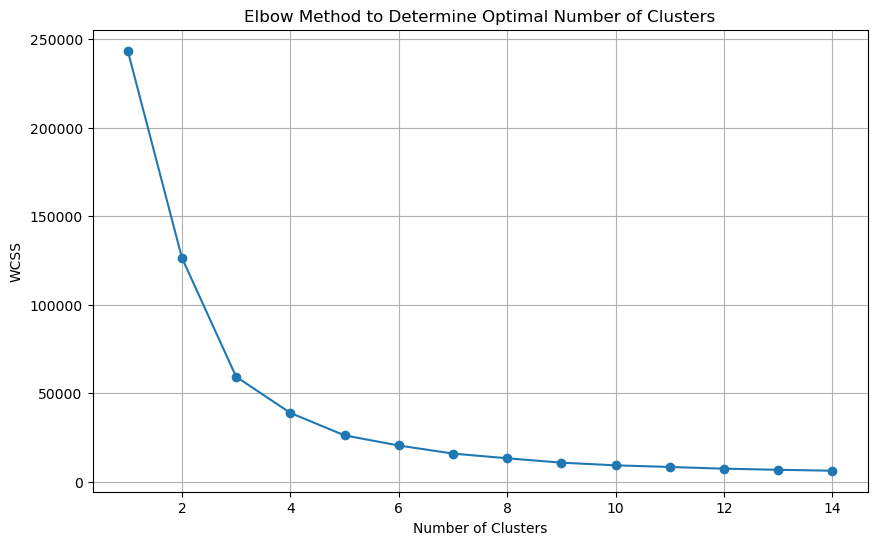

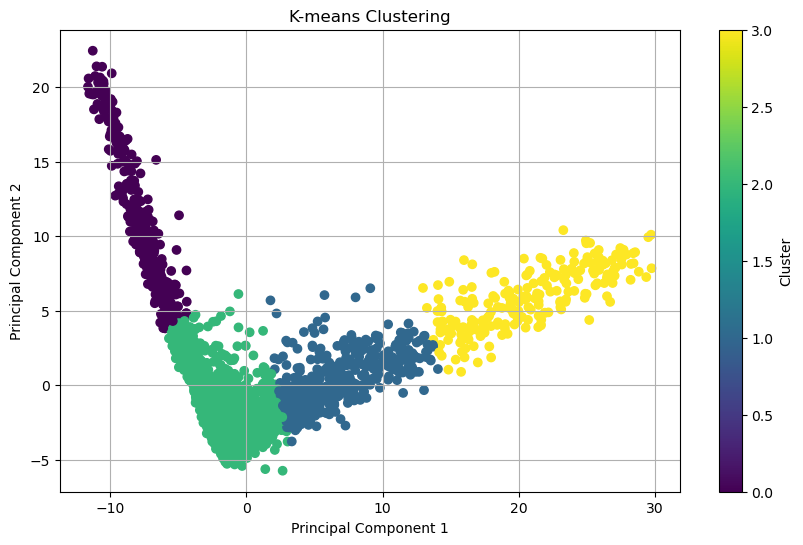

Average Silhouette Score: 0.6087801405102786


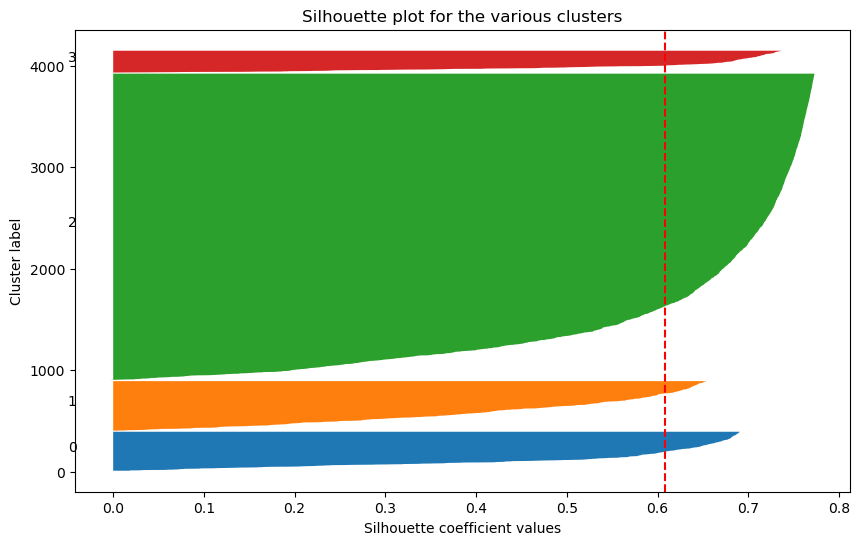

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,2016 PRICE VAR [%],Class,Year,Symbol,Sector,Cluster
0,3.203869e+10,-0.0491,1.756851e+10,1.424421e+10,0.000000e+00,6.385920e+09,1.024318e+10,4.363127e+09,6.249200e+08,3.643362e+09,...,-0.1013,-0.1432,0.0000,-0.0394,10.809451,1.0,2015.0,PG,Consumer Defensive,3
1,6.193685e+09,0.6587,4.669038e+09,1.524648e+09,1.658481e+08,5.223879e+08,1.205660e+09,3.189877e+08,1.321245e+07,3.154229e+08,...,0.2946,0.0281,0.5309,0.5179,-21.637010,0.0,2015.0,VIPS,Consumer Defensive,2
2,3.203869e+10,0.1026,1.756851e+10,1.424421e+10,0.000000e+00,6.385920e+09,1.024318e+10,3.137000e+09,4.880000e+08,2.630000e+09,...,0.0535,0.0254,0.0000,0.1293,-15.036503,0.0,2015.0,KR,Consumer Defensive,3
3,2.652838e+10,0.0393,1.756851e+10,7.576732e+09,0.000000e+00,6.385920e+09,6.733788e+09,8.429440e+08,3.976120e+08,4.268200e+08,...,1.0266,-0.0344,0.0000,0.0205,4.303799,1.0,2015.0,RAD,Consumer Defensive,1
4,1.763030e+10,-0.0156,1.168110e+10,5.949200e+09,0.000000e+00,3.328000e+09,3.871900e+09,2.077300e+09,3.154000e+08,1.808100e+09,...,-0.2118,0.0462,0.0000,-0.0421,10.693172,1.0,2015.0,GIS,Consumer Defensive,1


In [11]:
clusters, cluster_plot, silhouette_avg, silhouette_values = kmeans_clustering_analysis(data_2015, pca_components=2, num_clusters=4)
cluster_plot.show()

# Silhouette Score
print(f"Average Silhouette Score: {silhouette_avg}")
plot_silhouette_scores(clusters, silhouette_values, num_clusters=4, silhouette_avg=silhouette_avg)

# Display the first few rows of the dataframe with cluster labels
data_2015.head()

# Year 2016

## Silhouette Plot and Clustering Analysis (2016)

### Silhouette Plot:
The silhouette plot shows the silhouette coefficient values for each sample in the clusters. The average silhouette score is approximately 0.57, indicating that the clusters are moderately well-defined.

### Conclusions:

1. **Cluster Quality**:
   - The average silhouette score of 0.57 suggests that the clusters are moderately well-defined.
   - While many samples have high silhouette scores, indicating good cohesion within clusters, there are also some samples with lower scores, indicating some overlap between clusters.

2. **Cluster Sizes**:
   - Cluster 2 (green) is the largest, followed by clusters 1 (orange), 3 (red), and 0 (blue).
   - The thickness of each cluster's silhouette indicates the relative size of each cluster.


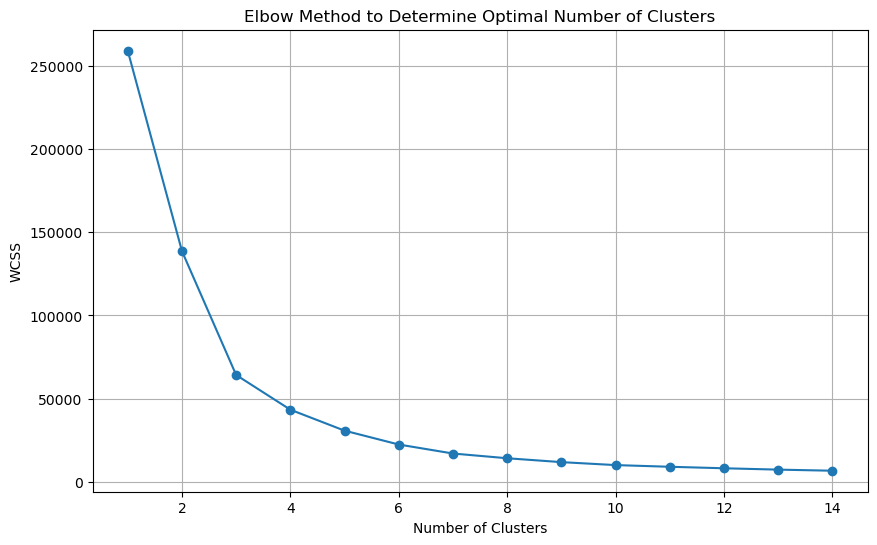

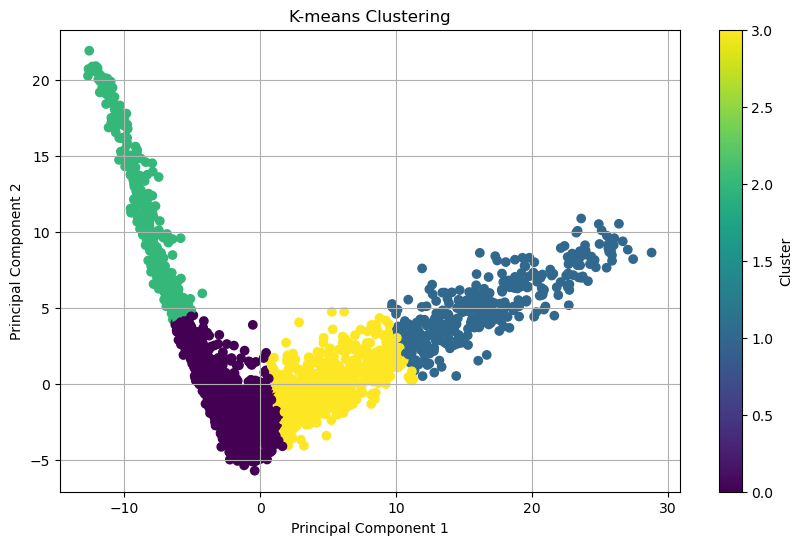

Average Silhouette Score: 0.5554479184027482


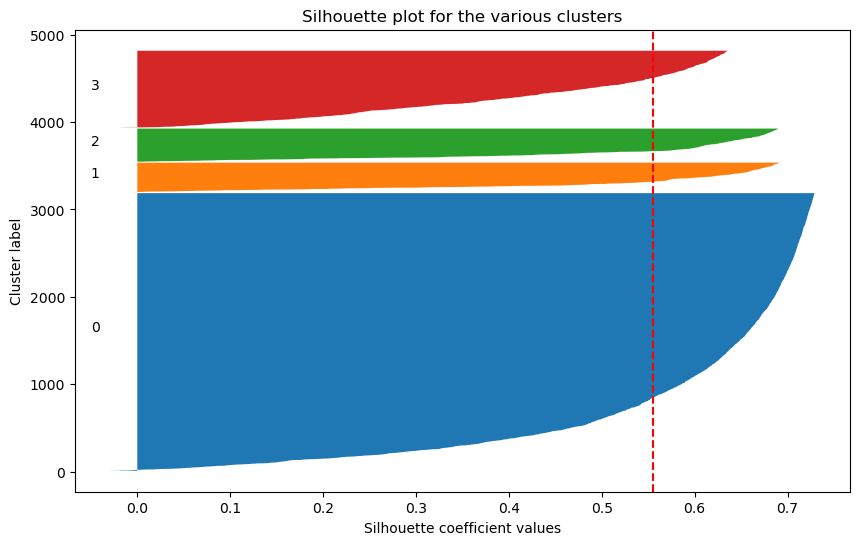

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,2017 PRICE VAR [%],Class,Year,Symbol,Sector,Cluster
0,2.927615e+10,-0.0770,1.784293e+10,1.282557e+10,0.000000e+00,7.387021e+09,1.469037e+10,3.913689e+09,5.790000e+08,3.656760e+09,...,-0.062700,0.0083,0.0000,-0.080900,12.532463,1.0,2016.0,PG,Consumer Defensive,1
1,8.148496e+09,0.3156,6.190740e+09,1.957756e+09,2.251378e+08,6.880959e+08,1.567877e+09,3.898789e+08,1.226710e+07,3.799345e+08,...,0.510900,-0.0139,0.3575,0.317200,4.363319,1.0,2016.0,VIPS,Consumer Defensive,0
2,2.927615e+10,0.0126,1.784293e+10,1.282557e+10,0.000000e+00,7.387021e+09,1.469037e+10,3.576000e+09,4.820000e+08,3.084000e+09,...,0.279700,0.0416,0.0000,0.045700,-17.068252,0.0,2016.0,KR,Consumer Defensive,1
3,2.077024e+10,-0.2171,1.577826e+10,4.991979e+09,0.000000e+00,4.581171e+09,4.621042e+09,3.709370e+08,1.861320e+08,2.149770e+08,...,1.886732,0.2581,0.0000,-0.290808,-60.881508,0.0,2016.0,RAD,Consumer Defensive,3
4,1.656310e+10,-0.0605,1.073360e+10,5.829500e+09,0.000000e+00,3.118900e+09,3.270300e+09,2.559200e+09,3.038000e+08,2.452600e+09,...,-0.010500,-0.0828,0.0000,-0.062800,-1.162942,0.0,2016.0,GIS,Consumer Defensive,3


In [12]:
clusters, cluster_plot, silhouette_avg, silhouette_values = kmeans_clustering_analysis(data_2016, pca_components=2, num_clusters=4)
cluster_plot.show()

# Silhouette Score
print(f"Average Silhouette Score: {silhouette_avg}")
plot_silhouette_scores(clusters, silhouette_values, num_clusters=4, silhouette_avg=silhouette_avg)

# Display the first few rows of the dataframe with cluster labels
data_2016.head()

# Year 2017

## Silhouette Plot and Clustering Analysis

### Silhouette Plot:
The silhouette plot shows the silhouette coefficient values for each sample in the clusters. The average silhouette score is approximately 0.60, indicating that the clusters are moderately well-defined.

### Conclusions:

1. **Cluster Quality**:
   - The average silhouette score of 0.60 suggests that the clusters are moderately well-defined.
   - While many samples have high silhouette scores, indicating good cohesion within clusters, there are also some samples with lower scores, indicating some overlap between clusters.

2. **Cluster Sizes**:
   - Cluster 3 (red) is the largest, followed by clusters 2 (green), 1 (orange), and 0 (blue).
   - The thickness of each cluster's silhouette indicates the relative size of each cluster.

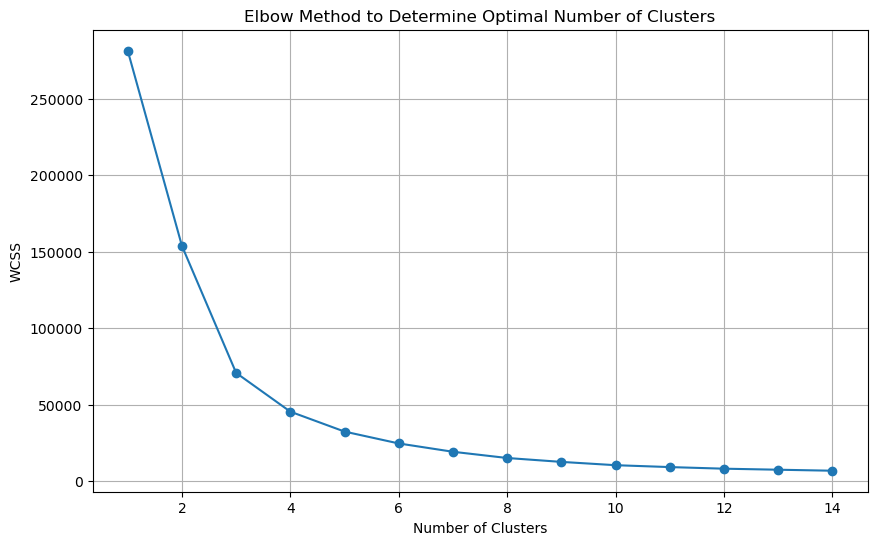

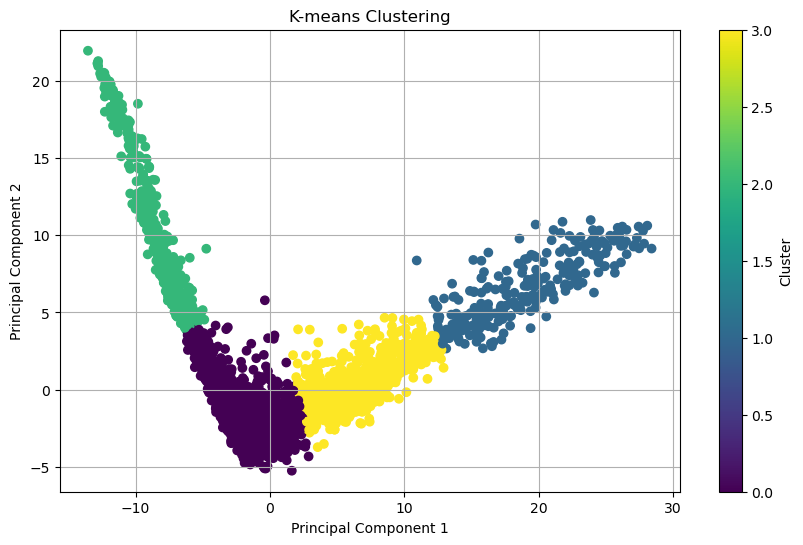

Average Silhouette Score: 0.594854290766197


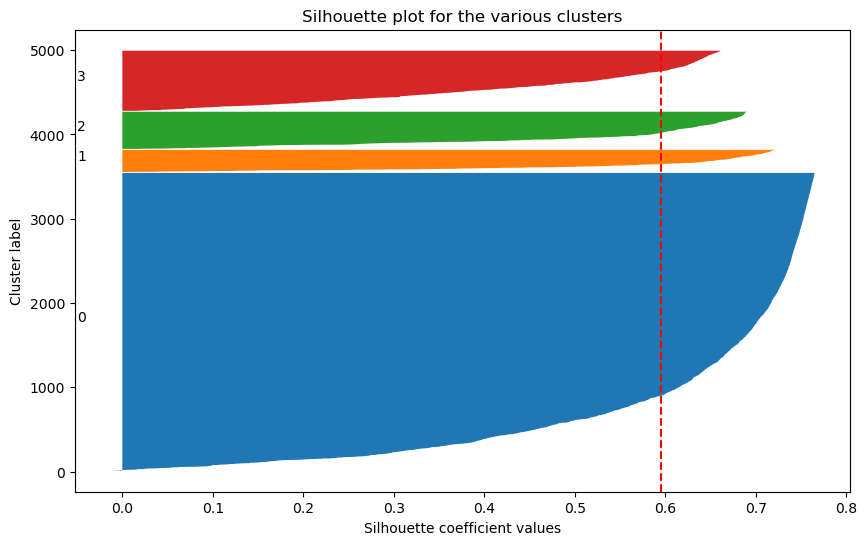

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,2018 PRICE VAR [%],Class,Year,Symbol,Sector,Cluster
0,3.550026e+10,-0.0037,1.766315e+10,1.569918e+10,0.000000e+00,6.223238e+09,1.020394e+10,4.695880e+09,4.650000e+08,3.737652e+09,...,0.0012,0.0325,0.0000,-0.0156,4.975151,1.0,2017.0,PG,Consumer Defensive,1
1,1.102060e+10,0.3525,8.557810e+09,2.462794e+09,2.733452e+08,8.201852e+08,2.056136e+09,4.066575e+08,1.245995e+07,3.893281e+08,...,1.5821,0.3805,0.2141,0.1920,-56.320000,0.0,2017.0,VIPS,Consumer Defensive,0
2,3.550026e+10,0.0501,1.766315e+10,1.569918e+10,0.000000e+00,6.223238e+09,1.020394e+10,3.452000e+09,5.220000e+08,2.932000e+09,...,0.0071,0.1654,0.0000,0.0678,-0.990449,0.0,2017.0,KR,Consumer Defensive,1
3,2.292754e+10,0.1039,1.766315e+10,5.064707e+09,0.000000e+00,4.776995e+09,4.816124e+09,2.485830e+08,2.000650e+08,4.849100e+07,...,0.0502,-0.5295,0.0000,0.0427,-66.666666,0.0,2017.0,RAD,Consumer Defensive,3
4,1.561980e+10,-0.0570,1.005200e+10,5.567800e+09,0.000000e+00,2.888800e+09,3.069200e+09,2.498600e+09,2.951000e+08,2.312700e+09,...,-0.0943,0.1246,0.0000,-0.0738,-31.280412,0.0,2017.0,GIS,Consumer Defensive,3


In [13]:
clusters, cluster_plot, silhouette_avg, silhouette_values = kmeans_clustering_analysis(data_2017, pca_components=2, num_clusters=4)
cluster_plot.show()

# Silhouette Score
print(f"Average Silhouette Score: {silhouette_avg}")
plot_silhouette_scores(clusters, silhouette_values, num_clusters=4, silhouette_avg=silhouette_avg)

# Display the first few rows of the dataframe with cluster labels
data_2017.head()

# Year 2018

## Silhouette Plot and Clustering Analysis

### Silhouette Plot:
The silhouette plot shows the silhouette coefficient values for each sample in the clusters. The average silhouette score is approximately 0.62, indicating that the clusters are well-defined.

### Conclusions:

1. **Cluster Quality**:
   - The average silhouette score of 0.62 suggests that the clusters are well-defined and distinct.
   - The majority of samples have high silhouette scores, indicating good cohesion within clusters and separation between clusters.

2. **Cluster Sizes**:
   - Cluster 0 (blue) is the largest, followed by clusters 1 (orange), 2 (green), and 3 (red).
   - The thickness of each cluster's silhouette indicates the relative size of each cluster.


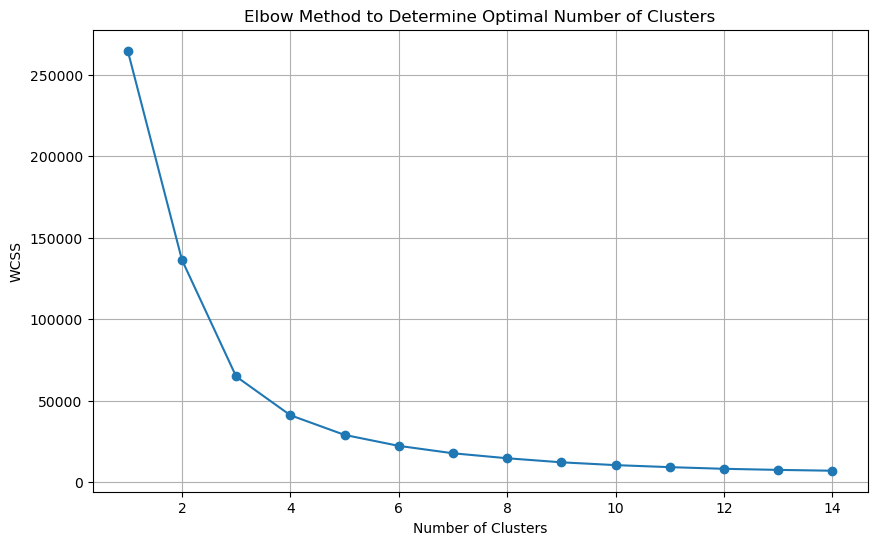

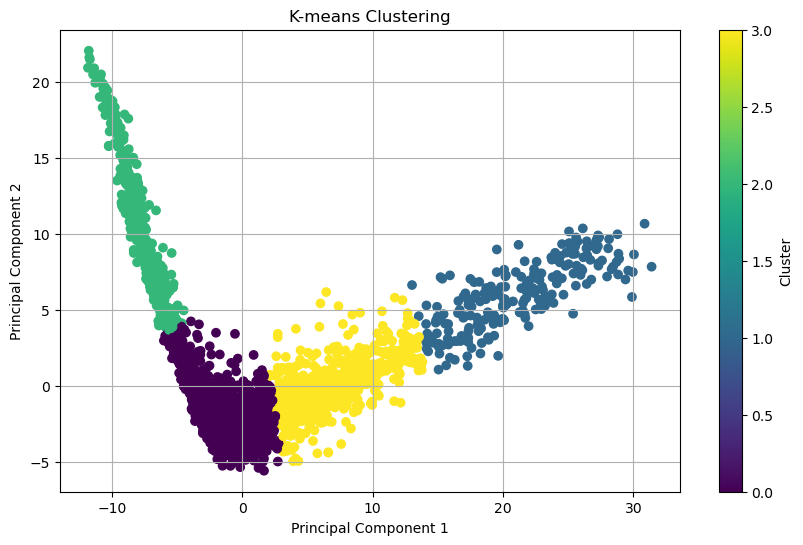

Average Silhouette Score: 0.6080040603596961


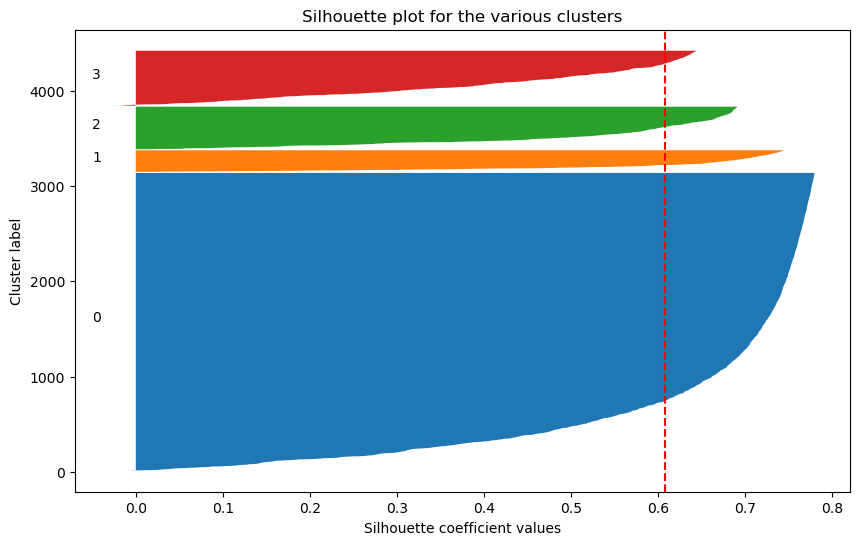

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,2019 PRICE VAR [%],Class,Year,Symbol,Sector,Cluster
0,3.363808e+10,0.1115,0.000000e+00,1.598558e+10,0.000000e+00,7.076200e+09,1.152842e+10,5.158460e+09,7.069737e+08,4.375440e+09,...,0.0722,0.7309,0.0000,0.1308,32.794573,1.0,2018.0,CMCSA,Consumer Cyclical,1
1,1.414400e+10,0.0320,7.288000e+09,6.856000e+09,0.000000e+00,6.010000e+08,3.062000e+09,3.794000e+09,7.069737e+08,2.196000e+09,...,0.0076,-0.0137,0.0000,-0.1265,40.588068,1.0,2018.0,KMI,Energy,1
2,3.363808e+10,0.1289,1.918014e+10,1.598558e+10,6.901222e+08,6.750000e+09,1.152842e+10,5.158460e+09,-2.595900e+02,4.375440e+09,...,0.1014,-0.0169,0.0390,-0.0942,30.295514,1.0,2018.0,INTC,Technology,1
3,3.039100e+10,0.4955,1.250000e+10,1.598558e+10,6.901222e+08,8.130000e+08,2.897000e+09,5.158460e+09,3.420000e+08,4.375440e+09,...,0.6395,-0.5841,0.1738,0.0942,64.213737,1.0,2018.0,MU,Technology,1
4,3.363808e+10,0.0285,1.918014e+10,1.598558e+10,0.000000e+00,7.076200e+09,1.152842e+10,-1.794900e+08,7.069737e+08,-2.256555e+08,...,-0.4487,-0.2297,0.0000,0.0308,44.757840,1.0,2018.0,GE,Industrials,1


In [14]:
clusters, cluster_plot, silhouette_avg, silhouette_values = kmeans_clustering_analysis(data_2018, pca_components=2, num_clusters=4)
cluster_plot.show()

# Silhouette Score
print(f"Average Silhouette Score: {silhouette_avg}")
plot_silhouette_scores(clusters, silhouette_values, num_clusters=4, silhouette_avg=silhouette_avg)

# Display the first few rows of the dataframe with cluster labels
data_2018.head()

# Overal Conclusions :

### Operational Efficiency and Profitability:

Component 1 captures the variance related to a company's operational efficiency and profitability. The high loadings on features like EBITDA, EBIT, and Operating Income suggest that these clusters represent different levels of operational performance among companies.

### Profitability Ratios:

Component 2 focuses on profitability ratios. The clusters separated along this component likely reflect differences in how efficiently companies convert their revenues into profits, considering various profitability margins.

### Cluster Interpretation:

- **Cluster 0**: This cluster might represent companies with high profitability and strong operational efficiency, as indicated by the high values along both principal components.
- **Cluster 1**: Companies in this cluster could have moderate operational performance but better profitability ratios than those in other clusters.
- **Cluster 2**: This cluster could represent companies with moderate to low operational performance and profitability ratios.
- **Cluster 3**: Companies in this cluster might have the lowest operational performance and profitability ratios among the groups.

### Investment Strategy:

- Investors can use this clustering analysis to identify groups of companies with similar financial characteristics. For example, clusters with high operational efficiency and profitability might be more attractive investment targets.
- Conversely, clusters representing companies with lower performance might be candidates for further investigation or exclusion from investment portfolios.


# Now Let's see what companies are in each cluster

In [15]:
def perform_pca_analysis(data, num_top_features=10):
    # Isolate numeric data for PCA
    numeric_data = data.select_dtypes(include=[np.number])
    
    # Standardize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(numeric_data)
    
    # Perform PCA
    pca = PCA()
    pca.fit(scaled_data)
    
    return pca, scaled_data

def kmeans_clustering_analysis(scaled_data, pca_components=2, num_clusters=4):
    # Apply PCA for dimensionality reduction
    pca = PCA(n_components=pca_components)
    pca_data = pca.fit_transform(scaled_data)
    
    # Apply K-means clustering
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
    clusters = kmeans.fit_predict(pca_data)
    
    return clusters, pca_data

def companies_in_clusters(data, num_clusters=4, pca_components=2):
    # Perform PCA analysis and scale the data
    pca, scaled_data = perform_pca_analysis(data)
    
    # Perform K-means clustering
    clusters, pca_data = kmeans_clustering_analysis(scaled_data, pca_components, num_clusters)
    
    # Add cluster labels to the original data
    data['Cluster'] = clusters
    
    # Group companies by their cluster
    cluster_groups = data.groupby('Cluster')
    
    # Create a dictionary to store company names in each cluster
    companies_dict = {i: cluster_groups.get_group(i)['Symbol'].tolist() for i in range(num_clusters)}
    
    return companies_dict

## Year 2014

In [16]:
# Example usage with the 2014 dataset
data_2014 = pd.read_csv('processed_data/clean_df_2014.csv')
companies_dict_2014 = companies_in_clusters(data_2014, num_clusters=4, pca_components=2)

# Display companies in each cluster for the 2014 dataset
for cluster, companies in companies_dict_2014.items():
    print(f"Cluster {cluster}:")
    print(companies)
    print()

Cluster 0:
['RAD', 'GIS', 'BRFS', 'KHC', 'KMB', 'CPB', 'CAG', 'CL', 'DG', 'TAP', 'SYY', 'BG', 'STZ', 'EL', 'TSN', 'HSY', 'FMX', 'SPB', 'KOF', 'CHSCM', 'CHSCN', 'CHSCL', 'CHSCO', 'CHSCP', 'CX', 'FCX', 'NUE', 'X', 'GGB', 'TS', 'AA', 'JCI', 'TECK', 'CE', 'HUN', 'WY', 'SID', 'CF', 'NEM', 'EMN', 'MOS', 'SCCO', 'ECL', 'PPG', 'SHW', 'VEDL', 'CRH', 'APD', 'GOLD', 'ICL', 'BSX', 'CELG', 'BIIB', 'MYL', 'BDX', 'ZBH', 'CYH', 'THC', 'BAX', 'AGN', 'A', 'DHR', 'UHS', 'TMO', 'DGX', 'ABC', 'ZTS', 'SYK', 'CAH', 'DVA', 'HUM', 'GRFS', 'SNN', 'FMS', 'SIRI', 'CZR', 'BABA', 'MAT', 'MGM', 'CCL', 'DISCA', 'DISCK', 'WYNN', 'SBUX', 'LVS', 'MLCO', 'IPG', 'TV', 'M', 'TJX', 'KSS', 'VFC', 'BLL', 'LB', 'GPS', 'MGA', 'NWS', 'IP', 'BBY', 'YUM', 'GT', 'APTV', 'BBBY', 'MAR', 'IGT', 'RCL', 'ALV', 'EXPE', 'QRTEA', 'VIAB', 'QSR', 'CBS', 'WRK', 'OMC', 'MHK', 'AN', 'TGNA', 'HLT', 'BWA', 'JWN', 'CUK', 'KMX', 'RL', 'GPC', 'ORLY', 'HOG', 'CCK', 'CBD', 'PVH', 'LEA', 'BKNG', 'AZO', 'PSO', 'FWONA', 'RELX', 'WPP', 'GHC', 'VIA', 'DISC

### Visual Analysis of K-means Clustering Results for 2014

Based on the K-means clustering plot, we can observe the following clusters and their potential implications:

- **Cluster 0 (Purple)**: This cluster is densely packed on the left side of the plot, indicating that the companies in this cluster share similar financial characteristics that distinguish them significantly from others.
- **Cluster 1 (Yellow)**: This cluster is well-separated and occupies a central position, potentially representing companies with balanced characteristics between operational efficiency and profitability.
- **Cluster 2 (Green)**: This cluster extends vertically on the far left, indicating a strong influence of the second principal component. Companies here might have distinct financial metrics related to profitability ratios.
- **Cluster 3 (Blue)**: This cluster is spread out on the right side and appears to have high values along the first principal component, suggesting strong overall financial health and operational efficiency.

### Cluster Composition and Potential Best Cluster
Based on the given component loadings and visual observations, we can hypothesize the following about each cluster:

- **Cluster 0 (Purple)**: Contains companies like RAD, GIS, BRFS, KHC, etc., which might have unique financial characteristics setting them apart. This cluster might include companies with specific market or sectorial advantages.
  
- **Cluster 1 (Yellow)**: Includes companies such as VIPS, TAL, NWL, HRL, etc., that might represent a balanced mix of profitability and operational performance. This cluster could be indicative of companies with stable financial performance.

- **Cluster 2 (Green)**: Comprising large and well-established companies like PG, KR, PM, KO, etc., this cluster likely represents the best-performing companies in terms of overall financial health and operational efficiency. This cluster could be seen as the "best" due to the inclusion of high-performing, large-cap companies.

- **Cluster 3 (Blue)**: This cluster consists of companies such as FRPT, COE, MUX, AGFS, etc., and might represent companies with distinct profitability ratios but potentially smaller in size or emerging markets.

### Conclusion
Visually, **Cluster 2 (Green)** appears to be the best cluster due to the presence of large, well-established companies with strong financial health and operational efficiency. This conclusion is further supported by the high loadings on financial metrics such as EBITDA, EBIT, Operating Income, and various profitability margins.

For a more detailed analysis, further investigation into the specific financial metrics and performance of companies within each cluster is recommended. This could involve examining the average values of key financial indicators within each cluster and comparing them against your criteria for identifying the "best" companies.


# Let's assess price growth potential, for each cluster by year

In [17]:
def analyze_cluster_performance(data, companies_clusters):
    # Create a dictionary to hold performance data for each cluster
    performance_dict = {}
    
    title = f'{str(round(data['Year'][0] + 1))} PRICE VAR [%]'
    
    for cluster, companies in companies_clusters.items():
        cluster_data = data[data['Symbol'].isin(companies)]
        mean_var = cluster_data[title].mean()
        median_var = cluster_data[title].median()
        std_var = cluster_data[title].std()
        performance_dict[cluster] = {'Mean': mean_var, 'Median': median_var, 'Standard Deviation': std_var}

    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster', y=title, data=data)
    plt.title(f'{title} Distribution by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(title)
    plt.grid(True)
    plt.show()
    return performance_dict


## 2014

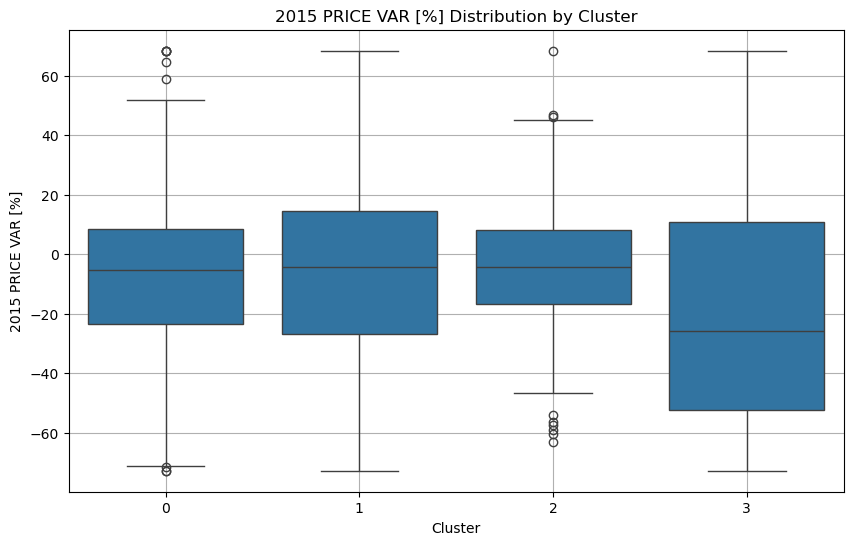

{0: {'Mean': -7.558368052043052,
  'Median': -5.207473518272104,
  'Standard Deviation': 25.601803431665978},
 1: {'Mean': -5.575555687081214,
  'Median': -4.446383757704537,
  'Standard Deviation': 32.43441077614007},
 2: {'Mean': -4.507988737110512,
  'Median': -4.144881278528617,
  'Standard Deviation': 21.778011674669422},
 3: {'Mean': -17.108889169068323,
  'Median': -25.852684943057145,
  'Standard Deviation': 44.0464517563657}}

In [18]:
# Calculate performance for each cluster
cluster_performance = analyze_cluster_performance(data_2014, companies_dict_2014)

# Display the performance
cluster_performance

## Analysis of 2015 Price Variation [%] Distribution by Cluster

The boxplot illustrates the distribution of the 2015 Price Variation [%] across four different clusters derived from the PCA and K-means clustering approach. Below is a summary of each cluster's statistical measures along with interpretations:

### Cluster 0
- **Mean Price Variation**: -7.56%
- **Median Price Variation**: -5.21%
- **Standard Deviation**: 25.60%
- **Interpretation**:
  - Cluster 0 shows a moderate mean price decrease with a relatively high variability in performance. Outliers indicate some stocks had significant losses or gains.

### Cluster 1
- **Mean Price Variation**: -5.58%
- **Median Price Variation**: -4.45%
- **Standard Deviation**: 32.43%
- **Interpretation**:
  - Similar to Cluster 0 but with the highest variability among all clusters, suggesting a very mixed performance with significant risks and potential gains.

### Cluster 2
- **Mean Price Variation**: -4.51%
- **Median Price Variation**: -4.14%
- **Standard Deviation**: 21.78%
- **Interpretation**:
  - The smallest mean decrease and the lowest standard deviation, indicating the most stable performances among the clusters.

### Cluster 3
- **Mean Price Variation**: -17.11%
- **Median Price Variation**: -25.85%
- **Standard Deviation**: 44.05%
- **Interpretation**:
  - This cluster experienced the largest mean and median price drops, combined with the highest variability, marking it as the most volatile and potentially riskiest cluster.

### General Observations
- Clusters 0, 1, and 2 show less negative mean and median price variations compared to Cluster 3.
- The presence of outliers in all clusters indicates that there were exceptional cases where companies either significantly outperformed or underperformed the general trends within their clusters.
- Investors might consider the stability of Cluster 2 for conservative investment strategies, while the other clusters, especially Cluster 3, might be suitable for risk-tolerant investors looking for potential high-reward opportunities.



## 2015

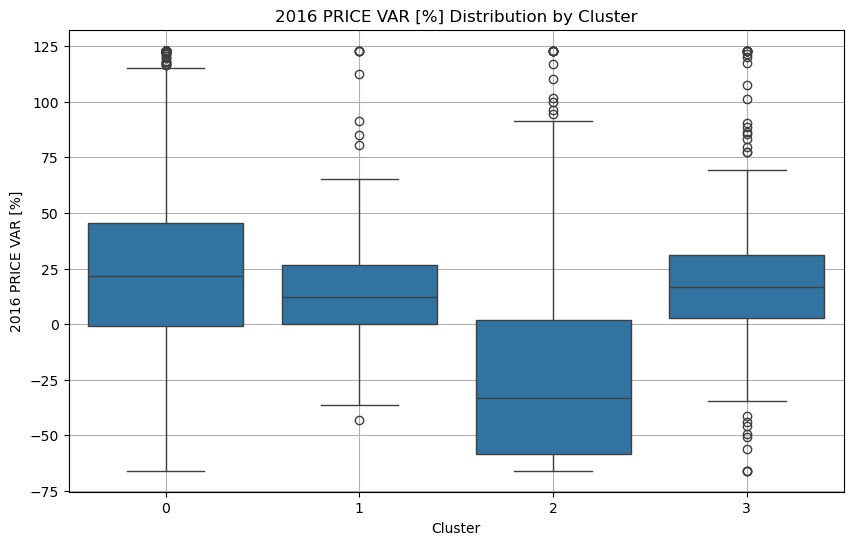

{0: {'Mean': 23.051303295539142,
  'Median': 21.50888283785634,
  'Standard Deviation': 40.253627535200955},
 1: {'Mean': 15.28407663793514,
  'Median': 12.394391041474837,
  'Standard Deviation': 26.66877248194441},
 2: {'Mean': -20.46548991276923,
  'Median': -33.002754253518894,
  'Standard Deviation': 45.77277510201074},
 3: {'Mean': 18.921533077181717,
  'Median': 16.79695795956756,
  'Standard Deviation': 29.352322923290668}}

In [19]:
companies_dict_2015 = companies_in_clusters(data_2015, num_clusters=4, pca_components=2)

# Calculate performance for each cluster
cluster_performance = analyze_cluster_performance(data_2015, companies_dict_2015)

# Display the performance
cluster_performance

## Analysis of 2016 Price Variation [%] Distribution by Cluster

The boxplot visualizes the 2016 Price Variation [%] across four different clusters, generated through PCA and K-means clustering. Here's a detailed summary of each cluster's performance along with their implications:

### Cluster 0
- **Mean Price Variation**: 23.05%
- **Median Price Variation**: 21.51%
- **Standard Deviation**: 40.25%
- **Interpretation**:
  - Cluster 0 shows a significant positive mean price variation, with a high standard deviation indicating considerable variability in company performances within this cluster.

### Cluster 1
- **Mean Price Variation**: 15.28%
- **Median Price Variation**: 12.39%
- **Standard Deviation**: 26.67%
- **Interpretation**:
  - Exhibits positive growth with less variability than Cluster 0, indicating more stable but slightly less robust growth compared to Cluster 0.

### Cluster 2
- **Mean Price Variation**: -20.47%
- **Median Price Variation**: -33.00%
- **Standard Deviation**: 45.77%
- **Interpretation**:
  - This cluster represents the poorest performance, with significant negative growth. It has the highest variability, suggesting a risky investment.

### Cluster 3
- **Mean Price Variation**: 18.92%
- **Median Price Variation**: 16.80%
- **Standard Deviation**: 29.35%
- **Interpretation**:
  - Shows good positive growth, with performance being relatively stable compared to Clusters 0 and 2.

### General Observations
- Clusters 0, 1, and 3 have demonstrated positive price variations, with Cluster 2 standing out as having a considerable negative impact.
- The presence of outliers across all clusters indicates extreme performances that significantly deviate from the typical company performance within each cluster.
- Investors might prefer Clusters 0, 1, and 3 for potential gains, with a particular caution towards the high variability in Cluster 0. Cluster 2 requires cautious evaluation due to its significant overall negative performance.



## 2016

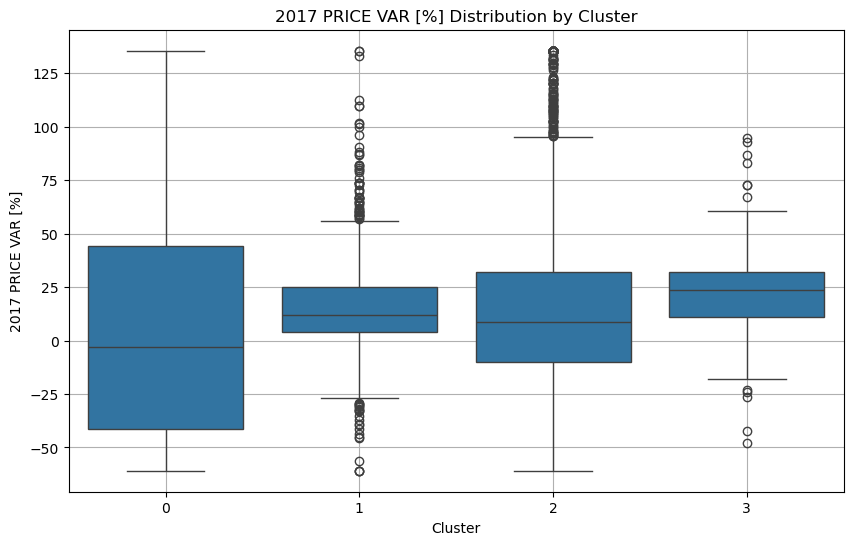

{0: {'Mean': 9.969520362179606,
  'Median': -2.8048972754883446,
  'Standard Deviation': 61.786054062627386},
 1: {'Mean': 15.796280644486377,
  'Median': 11.820514385516828,
  'Standard Deviation': 23.82853534933918},
 2: {'Mean': 14.531940936682819,
  'Median': 8.796424837575936,
  'Standard Deviation': 41.89354770275212},
 3: {'Mean': 22.608484951353766,
  'Median': 23.45238917119805,
  'Standard Deviation': 18.791904819723058}}

In [20]:
companies_dict_2016 = companies_in_clusters(data_2016, num_clusters=4, pca_components=2)

# Calculate performance for each cluster
cluster_performance = analyze_cluster_performance(data_2016, companies_dict_2016)

# Display the performance
cluster_performance

## Analysis of 2017 Price Variation [%] Distribution by Cluster

The boxplot visualizes the 2017 Price Variation [%] across four different clusters, derived through PCA and K-means clustering. Here's a detailed analysis of each cluster's performance with their statistical summaries:

### Cluster 0
- **Mean Price Variation**: 9.97%
- **Median Price Variation**: -2.80%
- **Standard Deviation**: 61.79%
- **Interpretation**:
  - Cluster 0 shows a high variability in performance with a positive mean but a negative median, indicating mixed results where some companies performed exceptionally well while others faced losses.

### Cluster 1
- **Mean Price Variation**: 15.80%
- **Median Price Variation**: 11.82%
- **Standard Deviation**: 23.83%
- **Interpretation**:
  - This cluster presents a more stable and positive performance with a tighter spread of returns, suggesting a generally consistent upward trend across companies.

### Cluster 2
- **Mean Price Variation**: 14.53%
- **Median Price Variation**: 8.80%
- **Standard Deviation**: 41.89%
- **Interpretation**:
  - Similar to Cluster 0, Cluster 2 exhibits significant variance in company performances but maintains a solid average growth rate, indicating some standout performers despite widespread fluctuation.

### Cluster 3
- **Mean Price Variation**: 22.61%
- **Median Price Variation**: 23.45%
- **Standard Deviation**: 18.79%
- **Interpretation**:
  - Exhibits the highest and most stable performance among all clusters, with both the highest mean and median variations. This cluster likely includes companies with robust growth throughout 2017.

### General Observations
- Clusters 1 and 3 demonstrate more stable and reliable growth patterns, making them attractive for investors seeking consistent returns.
- Cluster 0 and Cluster 2, while showing positive means, have a high standard deviation and include companies with potential for both significant gains and losses.
- The distribution of outliers across all clusters indicates that some companies experienced extreme growth or decline, which could skew the overall cluster averages.



## 2017

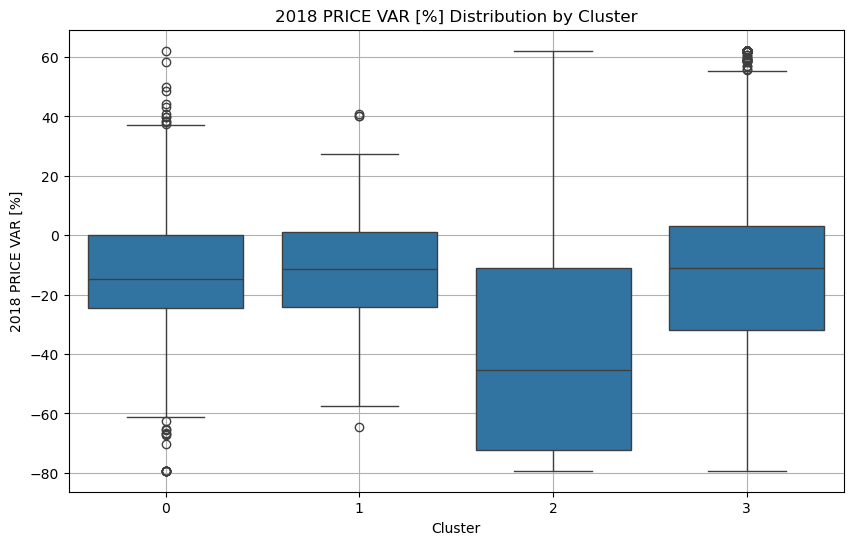

{0: {'Mean': -13.743199502744616,
  'Median': -14.860194699545243,
  'Standard Deviation': 21.49278101266038},
 1: {'Mean': -11.312750313699544,
  'Median': -11.28988527710636,
  'Standard Deviation': 18.531190389707824},
 2: {'Mean': -36.300643647650865,
  'Median': -45.449893412511344,
  'Standard Deviation': 40.78799836130624},
 3: {'Mean': -12.714139833893055,
  'Median': -11.023621086415284,
  'Standard Deviation': 31.052181097668658}}

In [21]:
companies_dict_2017 = companies_in_clusters(data_2017, num_clusters=4, pca_components=2)

# Calculate performance for each cluster
cluster_performance = analyze_cluster_performance(data_2017, companies_dict_2017)

# Display the performance
cluster_performance

## 2018 PRICE VAR [%] Distribution by Cluster

The 2018 PRICE VAR [%] distribution highlights the performance of stocks within each cluster for the year. Below is the detailed statistical breakdown for each cluster:

### Cluster 0
- **Mean**: -13.74%
- **Median**: -14.86%
- **Standard Deviation**: 21.49%
- **Observation**: Stocks in this cluster generally saw a decline, with variability around the mean.

### Cluster 1
- **Mean**: -11.31%
- **Median**: -11.29%
- **Standard Deviation**: 18.53%
- **Observation**: This cluster had a slightly better performance than Cluster 0, with a smaller spread indicating less volatility.

### Cluster 2
- **Mean**: -36.30%
- **Median**: -45.45%
- **Standard Deviation**: 40.79%
- **Observation**: Cluster 2 experienced the most significant decline in stock prices, with a very high standard deviation indicating extreme variability and potential outliers.

### Cluster 3
- **Mean**: -12.71%
- **Median**: -11.02%
- **Standard Deviation**: 31.05%
- **Observation**: Stocks in Cluster 3 showed similar declines to Clusters 0 and 1 but with a wider range of returns, indicating some stocks performed much better or much worse than the average.

### General Note
The negative means across all clusters suggest a challenging year for stocks in these clusters, with Cluster 2 facing the most severe downturns. The presence of outliers in the boxplot indicates that some stocks either significantly outperformed or underperformed relative to their respective cluster averages.



## 2018

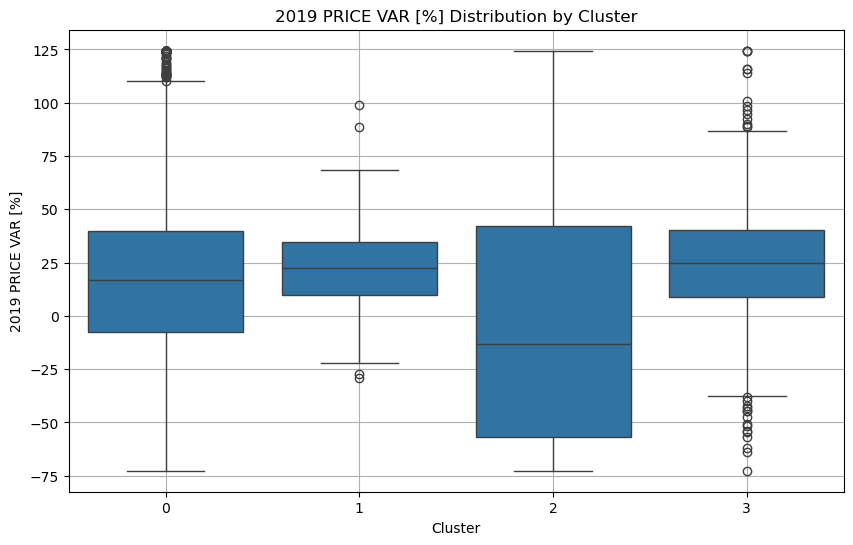

{0: {'Mean': 17.63230927088733,
  'Median': 16.945500144335064,
  'Standard Deviation': 41.76565651352241},
 1: {'Mean': 22.77651718344545,
  'Median': 22.2486103718202,
  'Standard Deviation': 20.092971363034803},
 2: {'Mean': -0.35063492478803227,
  'Median': -13.31071047729153,
  'Standard Deviation': 62.701135250698385},
 3: {'Mean': 24.548631297708344,
  'Median': 25.00097676185659,
  'Standard Deviation': 28.973136429242896}}

In [22]:
companies_dict_2018 = companies_in_clusters(data_2018, num_clusters=4, pca_components=2)

# Calculate performance for each cluster
cluster_performance = analyze_cluster_performance(data_2018, companies_dict_2018)

# Display the performance
cluster_performance

## 2019 PRICE VAR [%] Distribution by Cluster

The 2019 PRICE VAR [%] distribution across the clusters indicates varied performance among the stocks. Here’s a detailed look at each cluster:

### Cluster 0
- **Mean**: 17.63%
- **Median**: 16.95%
- **Standard Deviation**: 41.77%
- **Observation**: This cluster shows a positive performance, with most stocks gaining, though the high standard deviation indicates significant variability.

### Cluster 1
- **Mean**: 22.78%
- **Median**: 22.25%
- **Standard Deviation**: 20.09%
- **Observation**: Cluster 1 stocks have shown good growth with less variability compared to Cluster 0, indicating a stable positive performance.

### Cluster 2
- **Mean**: -0.35%
- **Median**: -13.31%
- **Standard Deviation**: 62.70%
- **Observation**: This cluster exhibits a slight overall decline, but the extremely high standard deviation suggests that some stocks had significant gains or losses.

### Cluster 3
- **Mean**: 24.55%
- **Median**: 25.00%
- **Standard Deviation**: 28.97%
- **Observation**: Cluster 3 achieved the highest median performance, suggesting robust growth across most of its stocks, although variability remains considerable.

### General Note
The clusters in 2019 show a mix of performances, with Clusters 0, 1, and 3 experiencing substantial growth, and Cluster 2 facing challenges. The variability in performance within each cluster, especially Cluster 2, underscores the diverse outcomes within the same group.
